In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [4]:
df_train = pd.read_csv('https://raw.githubusercontent.com/farrelrassya/teachingMLDL/refs/heads/main/01.%20Machine%20Learning/04.%20Week%204/Datasets/FeatureEngineering/train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/farrelrassya/teachingMLDL/refs/heads/main/01.%20Machine%20Learning/04.%20Week%204/Datasets/FeatureEngineering/test.csv')
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [7]:
print(f'Jumlah data kosong:\n{df_train.isnull().sum()}')

Jumlah data kosong:
Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [8]:
# Menangani data kosong 
n_cols = len(df_train['MSSubClass'])
print(f'Jumlah entri : {n_cols}')
print('Kolom df_train dengan missing value lebih dari 1/2 jumlah data :')

for i, x in enumerate(df_train.columns):
    if df_train[x].count() < int(n_cols / 2):
        print(f'{i+1}. {x}')

print('Kolom df_test dengan missing value lebih dari 1/2 jumlah data :')
for i, x in enumerate(df_test.columns):
    if df_train[x].count() < int(n_cols / 2):
        print(f'{i+1}. {x}')

Jumlah entri : 1460
Kolom df_train dengan missing value lebih dari 1/2 jumlah data :
7. Alley
26. MasVnrType
73. PoolQC
74. Fence
75. MiscFeature
Kolom df_test dengan missing value lebih dari 1/2 jumlah data :
7. Alley
26. MasVnrType
73. PoolQC
74. Fence
75. MiscFeature


In [9]:
print('\nMenghapus kolom-kolom di atas....\n')
for i, x in enumerate(df_train.columns):
    if df_train[x].count() < int(n_cols / 2):
        df_train.drop(x, axis=1, inplace=True)
        df_test.drop(x, axis=1, inplace=True)

# Menampilkan kolom-kolom yang tersisa
print(df_train.columns)


Menghapus kolom-kolom di atas....

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'Pave

In [10]:
# Pisahkan kolom numerik dan kategorik
train_numeric_cols = df_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
train_categorical_cols = df_train.select_dtypes(include='object').columns.tolist()

test_numeric_cols = df_test.select_dtypes(include=['int64', 'float64']).columns.tolist()
test_categorical_cols = df_test.select_dtypes(include='object').columns.tolist()

print(train_numeric_cols)
print(train_categorical_cols)


['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 

In [11]:
# Imputasi dengan mean untuk numerik dan mode untuk kategorikal
numeric_imputer = SimpleImputer(strategy='mean')
df_train[train_numeric_cols] = numeric_imputer.fit_transform(df_train[train_numeric_cols])
df_test[test_numeric_cols] = numeric_imputer.fit_transform(df_test[test_numeric_cols])

categorical_imputer = SimpleImputer(strategy='most_frequent')
df_train[train_categorical_cols] = categorical_imputer.fit_transform(df_train[train_categorical_cols])
df_test[test_categorical_cols] = categorical_imputer.fit_transform(df_test[test_categorical_cols])

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   float64
 1   MSSubClass     1460 non-null   float64
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   float64
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   float64
 17  OverallCond    1460 non-null   float64
 18  YearBuil

In [12]:
df_train.describe(include='object')

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,...,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460
unique,5,2,4,4,2,5,3,25,9,8,...,4,7,5,6,3,5,5,3,9,6
top,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,WD,Normal
freq,1151,1454,925,1311,1459,1052,1382,225,1260,1445,...,735,1360,1070,951,686,1392,1407,1340,1267,1198


In [13]:
# 2. Preprocessing df_train & df_test
print("Nilai unik pada kolom 'MSZoning':", df_train['MSZoning'].unique())

# Encode variabel kategorikal
le = LabelEncoder()
for column in train_categorical_cols:
    df_train[column] = le.fit_transform(df_train[column])
    df_test[column] = le.fit_transform(df_test[column])

# Periksa nilai unik pada kolom 'MSZoning' setelah encoding
print("Nilai unik pada kolom 'MSZoning' setelah encoding:", df_train['MSZoning'].unique())


Nilai unik pada kolom 'MSZoning': ['RL' 'RM' 'C (all)' 'FV' 'RH']
Nilai unik pada kolom 'MSZoning' setelah encoding: [3 4 0 1 2]


In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   float64
 1   MSSubClass     1460 non-null   float64
 2   MSZoning       1460 non-null   int32  
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   float64
 5   Street         1460 non-null   int32  
 6   LotShape       1460 non-null   int32  
 7   LandContour    1460 non-null   int32  
 8   Utilities      1460 non-null   int32  
 9   LotConfig      1460 non-null   int32  
 10  LandSlope      1460 non-null   int32  
 11  Neighborhood   1460 non-null   int32  
 12  Condition1     1460 non-null   int32  
 13  Condition2     1460 non-null   int32  
 14  BldgType       1460 non-null   int32  
 15  HouseStyle     1460 non-null   int32  
 16  OverallQual    1460 non-null   float64
 17  OverallCond    1460 non-null   float64
 18  YearBuil

C:\Users\Chandra Aulia H\AppData\Local\Temp\ipykernel_25260\3525138767.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corr.values, y=top_corr.index, palette='viridis')


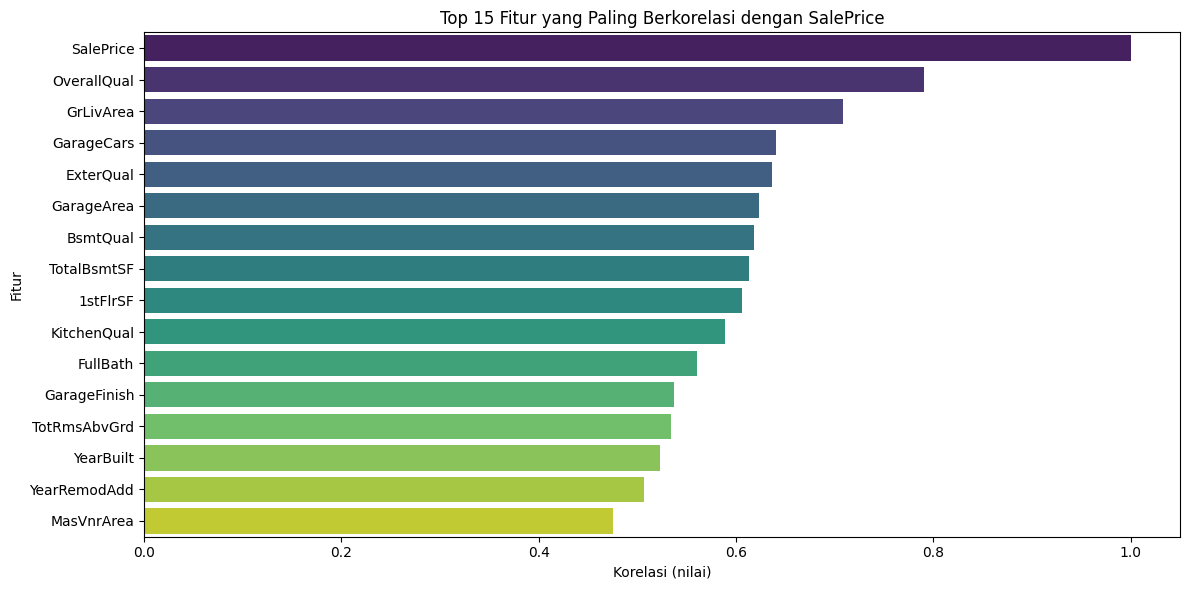

In [15]:
# Hitung korelasi antarfitur
correlation = df_train.corr()

# Ambil korelasi terhadap 'SalePrice', urutkan dari yang paling besar (selain SalePrice sendiri)
top_corr = correlation['SalePrice'].abs().sort_values(ascending=False).head(16)
top_test_corr = top_corr.drop(['SalePrice'])

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=top_corr.values, y=top_corr.index, palette='viridis')
plt.title('Top 15 Fitur yang Paling Berkorelasi dengan SalePrice')
plt.xlabel('Korelasi (nilai)')
plt.ylabel('Fitur')
plt.tight_layout()
plt.show()

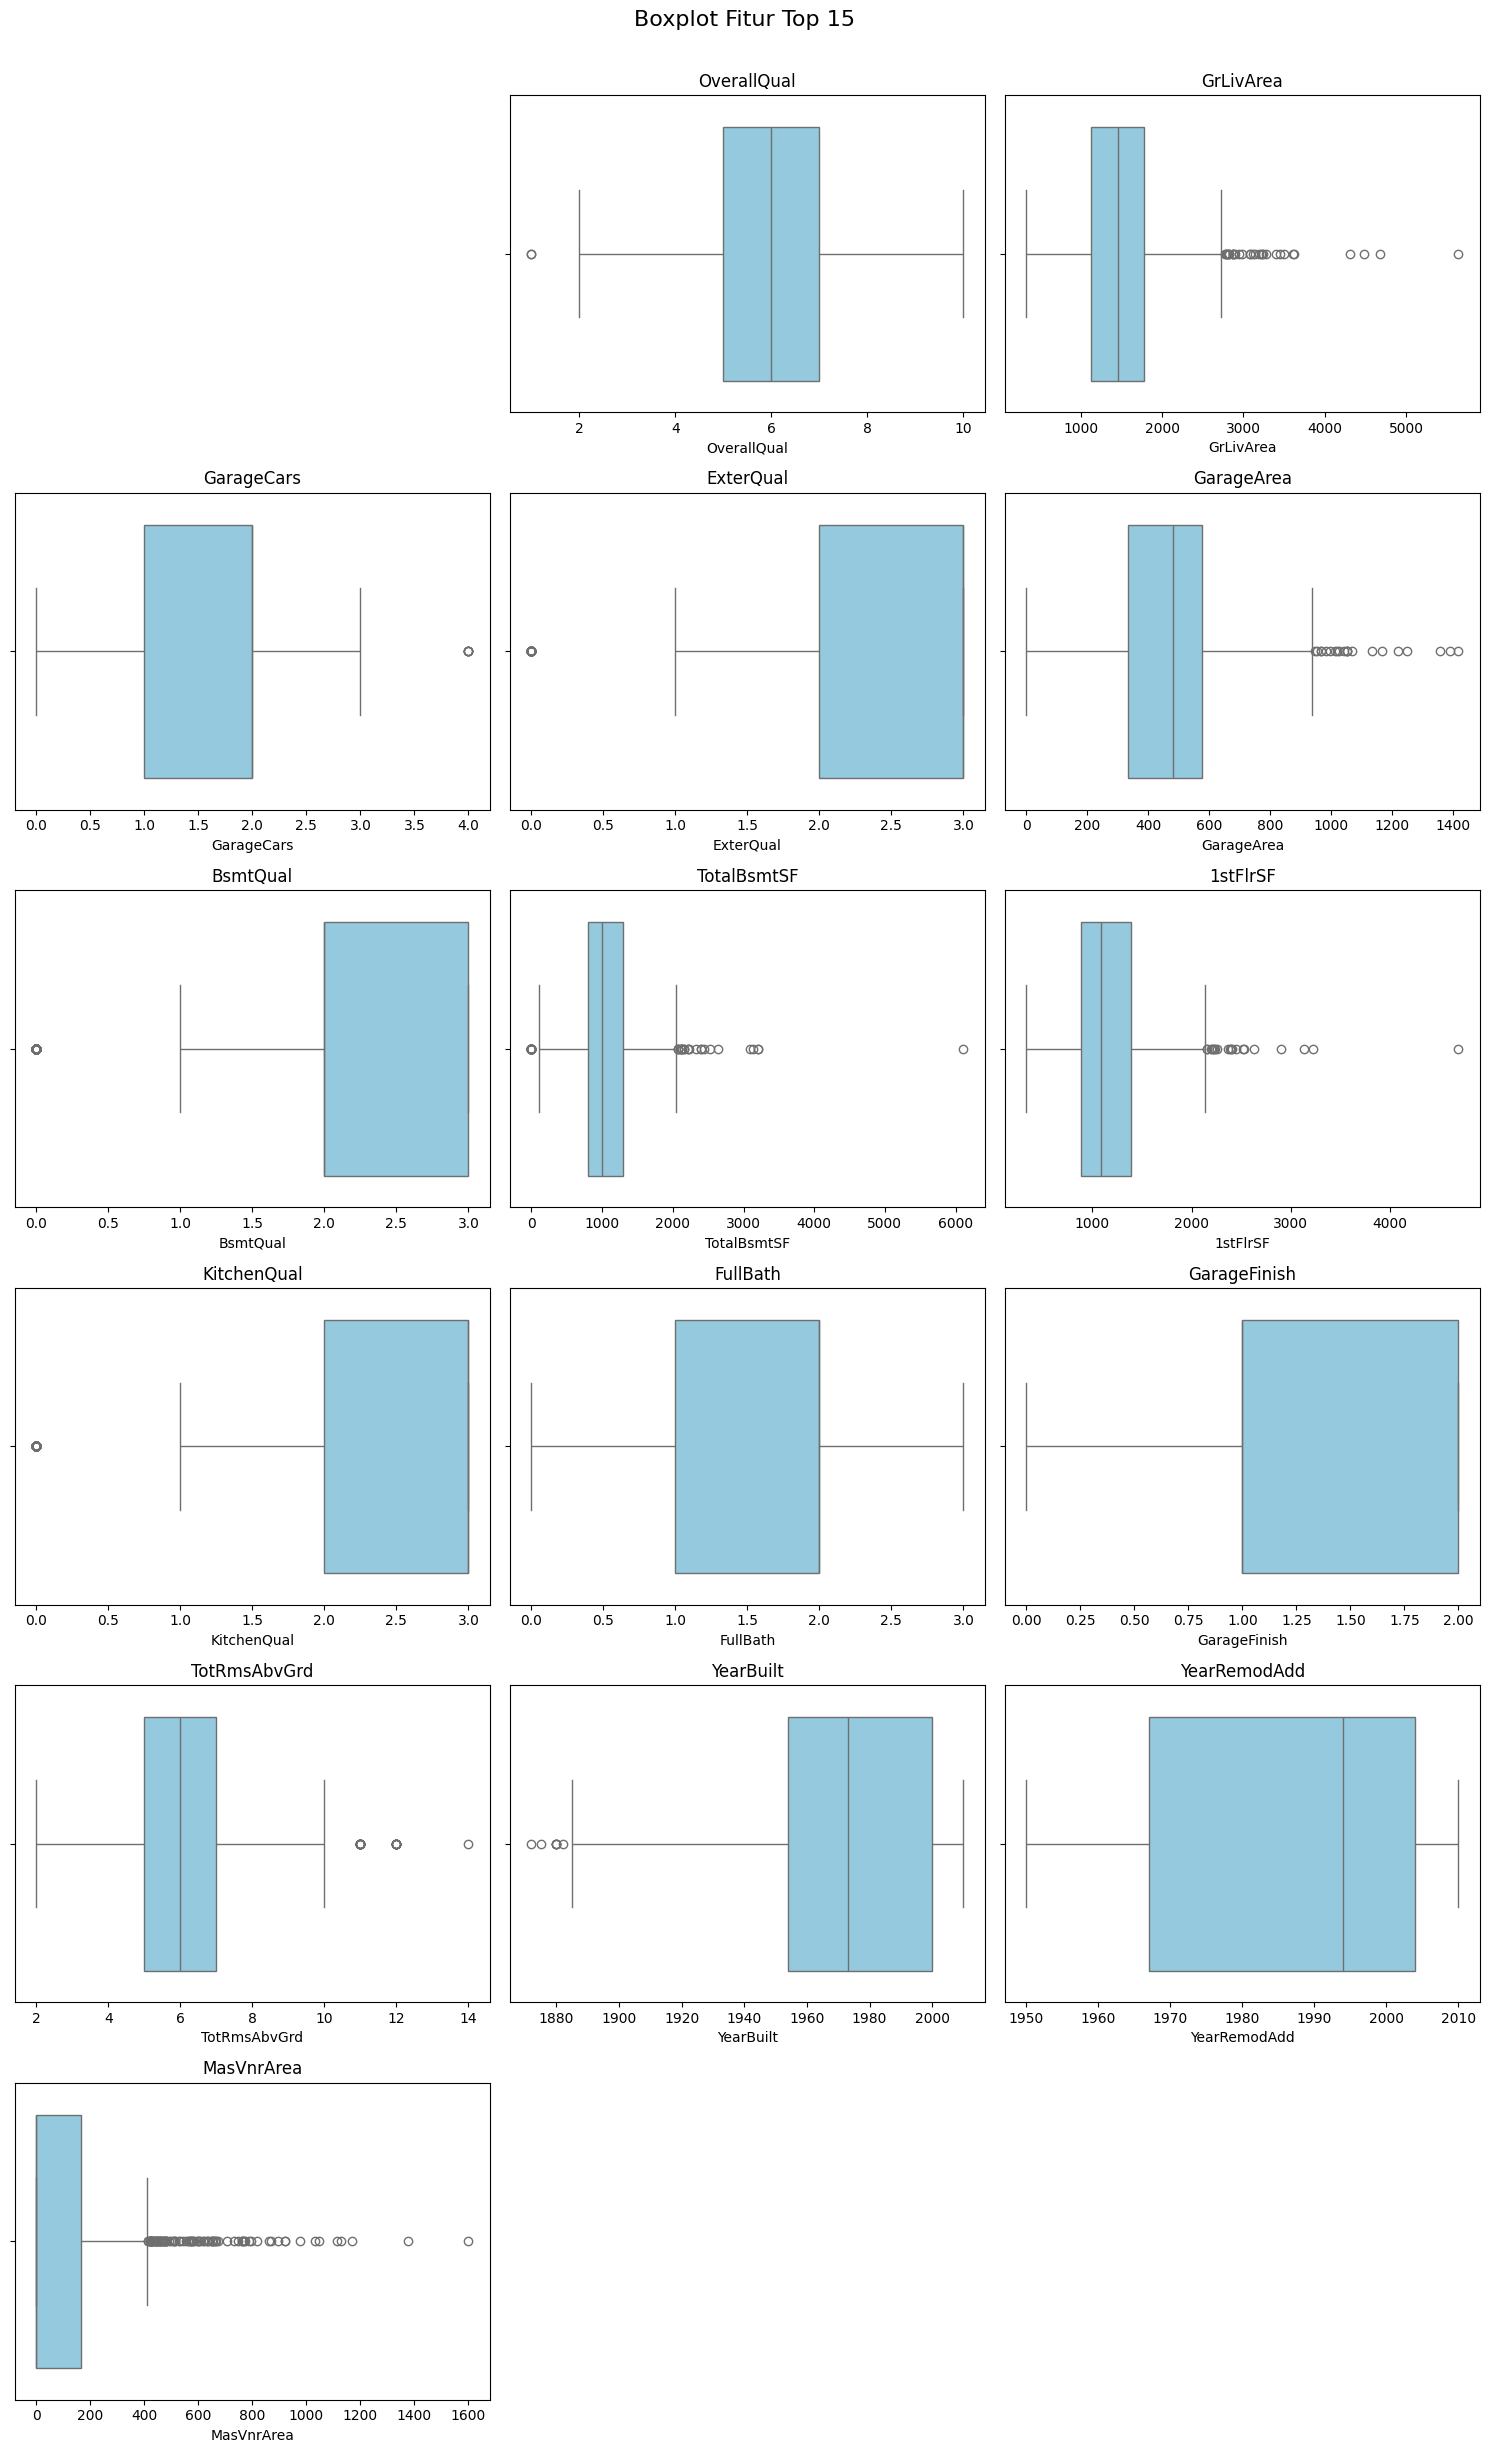

In [16]:
# Mengatasi outliers
# Ambil 15 fitur dari korelasi sebelumnya
top_features = top_corr.index.tolist()  
top_test_features = top_test_corr.index.tolist()  

# Ambil subset data
df_top = df_train[top_features].copy()
df_test_top = df_test[top_test_features].copy()

n = len(top_features)
cols = 3  # jumlah kolom per baris
rows = math.ceil(n / cols)

plt.figure(figsize=(cols * 5, rows * 4))

for i, feature in enumerate(top_features):
    if feature == 'SalePrice' :
        continue
    plt.subplot(rows, cols, i + 1)
    sns.boxplot(data=df_top, x=feature, color='skyblue')
    plt.title(feature)
    plt.tight_layout()

plt.suptitle('Boxplot Fitur Top 15', fontsize=16, y=1.02)
plt.show()

In [17]:
print(f"Jumlah data train awal: {len(df_top)}")
print(f"Jumlah data test awal: {len(df_test_top)}")

for feature in top_features:
    Q1 = df_top[feature].quantile(0.25)
    Q3 = df_top[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter hanya nilai dalam rentang IQR
    df_top = df_top[(df_top[feature] >= lower_bound) & (df_top[feature] <= upper_bound)]

for test_feature in top_test_features:
    Q1 = df_test_top[test_feature].quantile(0.25)
    Q3 = df_test_top[test_feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter hanya nilai dalam rentang IQR
    df_test_top = df_top[(df_top[test_feature] >= lower_bound) & (df_top[test_feature] <= upper_bound)]

# Tampilkan hasil akhir
print(f"Jumlah data train setelah menghapus outlier: {len(df_top)}")
print(f"Jumlah data test setelah menghapus outlier: {len(df_test_top)}")

Jumlah data train awal: 1460
Jumlah data test awal: 1459
Jumlah data train setelah menghapus outlier: 1096
Jumlah data test setelah menghapus outlier: 1009


In [ ]:
from sklearn.model_selection import train_test_split
X = df_top.drop('SalePrice', axis=1)
y = df_top['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Jumlah data training: {X_train.shape[0]}")
print(f"Jumlah data testing: {X_test.shape[0]}")

Jumlah data training: 876
Jumlah data testing: 220


In [20]:
# Standardize the data (important for linear regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_test)

In [21]:
# Train the Linear Regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [22]:
# Make predictions
y_pred_train = model.predict(X_train_scaled)
y_pred_valid = model.predict(X_valid_scaled)

In [30]:
# Evaluate the model
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train)

mse_valid = mean_squared_error(y_test, y_pred_valid)
rmse_valid = np.sqrt(mse_valid)
r2_valid = r2_score(y_test, y_pred_valid)

# Print the evaluation results
print(f'Training \nMSE: {mse_train : .3f}, \nRMSE: {rmse_train : .3f}, \nR²: {r2_train : .3f}\n\n')
print(f'Validation \nMSE: {mse_valid : .3f}, \nRMSE: {rmse_valid : .3f}, \nR²: {r2_valid : .3f}')

Training 
MSE:  415366187.159, 
RMSE:  20380.535, 
R²:  0.818


Validation 
MSE:  677885290.156, 
RMSE:  26036.230, 
R²:  0.722


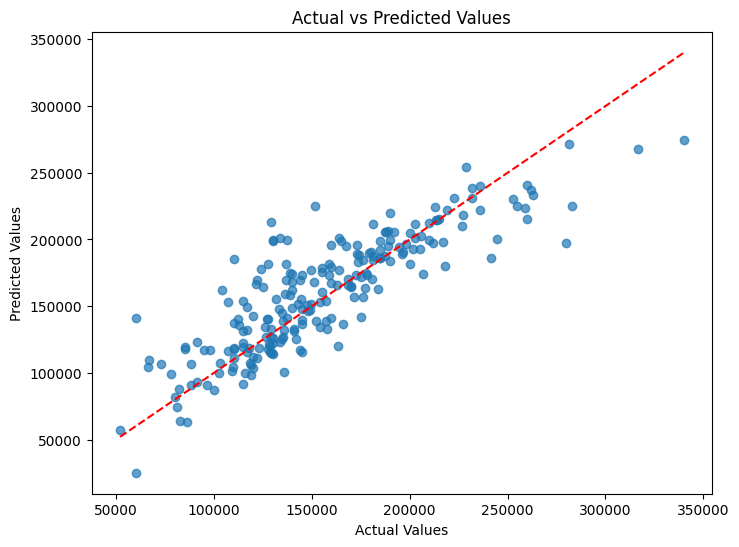

In [31]:
# Visualisasi Prediksi vs Aktual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_valid, alpha=0.7)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")  # Garis y=x
plt.show()


## Mean Squared Error (MSE)
Mean Squared Error (MSE) adalah metrik yang digunakan untuk mengukur rata-rata kuadrat dari selisih antara nilai sebenarnya (y_true) dan nilai prediksi (y_pred). Rumus MSE:

\[ MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 \]

Semakin kecil nilai MSE, semakin baik model dalam memprediksi nilai yang benar.



## Root Mean Squared Error (RMSE)
Root Mean Squared Error (RMSE) adalah akar kuadrat dari MSE. Rumusnya adalah:

\[ RMSE = \sqrt{MSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2} \]

RMSE memiliki satuan yang sama dengan data asli, sehingga lebih mudah untuk diinterpretasikan dibandingkan MSE.



## R-squared (R²)
R-squared (R²) adalah metrik yang digunakan untuk mengukur seberapa baik model menjelaskan variasi dalam data. Rumusnya:

\[ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} \]

Di mana:
- \( SS_{res} = \sum (y_i - \hat{y}_i)^2 \) adalah jumlah kuadrat residual (error).
- \( SS_{tot} = \sum (y_i - \bar{y})^2 \) adalah jumlah kuadrat total.

Nilai R² berkisar antara 0 hingga 1. Semakin mendekati 1, semakin baik model dalam menjelaskan variasi data.